In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

### Reading the dataset

In [2]:
df = pd.read_csv(r'C:/Users/Venom/Desktop/694560_1215964_bundle_archive/city_temperature.csv')

D:\AnacondaNavigator\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Dropping Duplicates

In [3]:
df.drop_duplicates(inplace=True)

### Number of uniques in each columns

##### There are 7 regions with 125 countries and 52 states.There are a lot of null values in the state column so it should be removed.We can find the geometric coordinates of the cities for better understanding of the average temperature.The month, day and year can be converted back to days to getter more information like week and quarters out of them.

In [4]:
df.nunique()

Region               7
Country            125
State               52
City               321
Month               12
Day                 32
Year                28
AvgTemperature    1517
dtype: int64

##### The North American Region in particular US is in majority in the dataset

In [5]:
df.Region.value_counts()/df.shape[0]*100

North America                        53.304152
Europe                               13.162061
Asia                                 10.973859
Africa                                8.702417
South/Central America & Carribean     7.607710
Middle East                           4.323138
Australia/South Pacific               1.926662
Name: Region, dtype: float64

#### Remove the Average temperatures of 2020 as it is fairly recent and may contain imputed values

In [6]:
print(df.shape)
df = df[df.Year!=2020]
df.shape

(2885612, 8)


(2847070, 8)

#### Considering Average Temperatute less than -50 as Outliers

In [7]:
df = df[df.AvgTemperature>=-50]

#### Increasin temperature yearwise

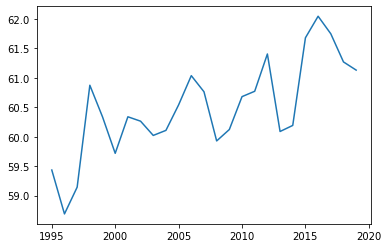

In [9]:
Year = list(df.groupby('Year').AvgTemperature.mean().to_dict().keys())     
AvgTemp = list(df.groupby('Year').AvgTemperature.mean().to_dict().values())
plt.plot(Year, AvgTemp, '-')

#### The average temperature across the year

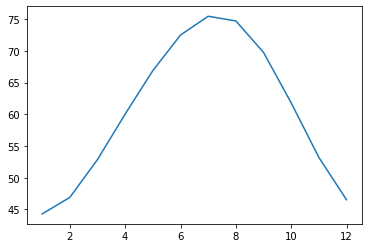

In [10]:
month = list(df.groupby('Month').AvgTemperature.mean().to_dict().keys())     
AvgTemp = list(df.groupby('Month').AvgTemperature.mean().to_dict().values())
plt.plot(month, AvgTemp, '-')

#### end of the month has a huge spike in avg temperature

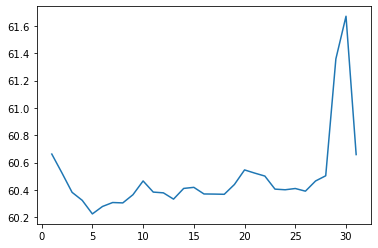

In [11]:
day = list(df.groupby('Day').AvgTemperature.mean().to_dict().keys())     
AvgTemp = list(df.groupby('Day').AvgTemperature.mean().to_dict().values())
plt.plot(day, AvgTemp, '-')

#### Distribution of Average Temperature

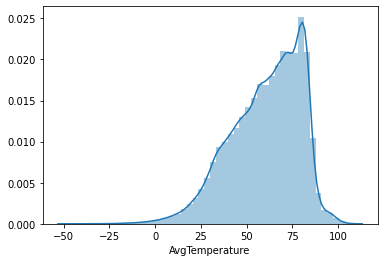

In [12]:
sns.distplot(df.AvgTemperature)

#### City wise dsitribution of Temperature

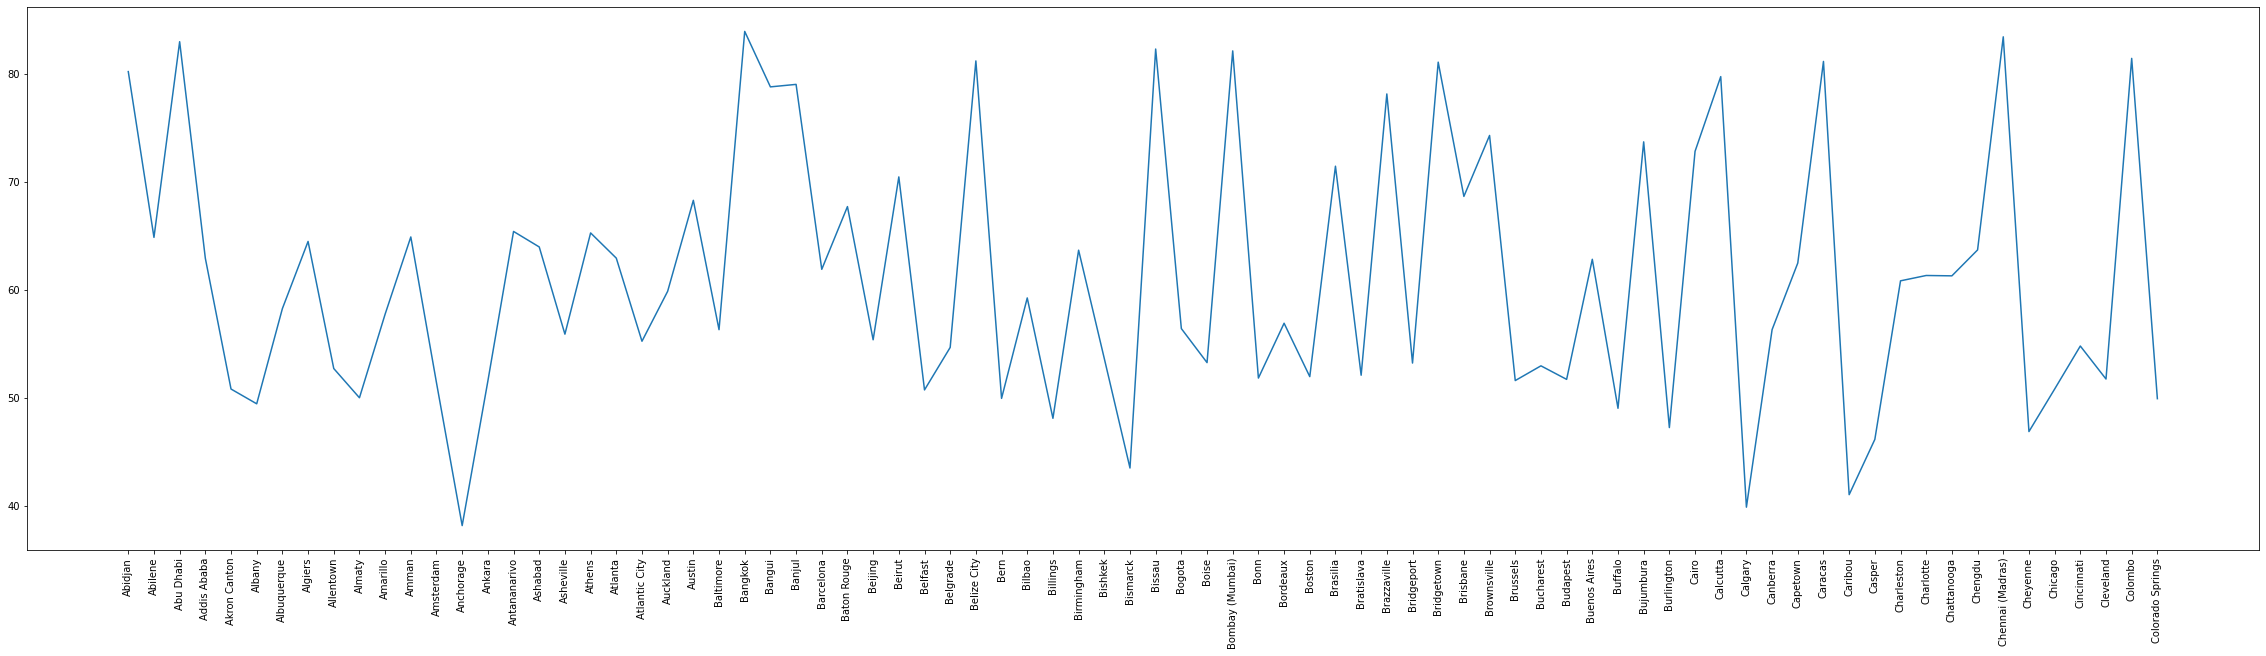

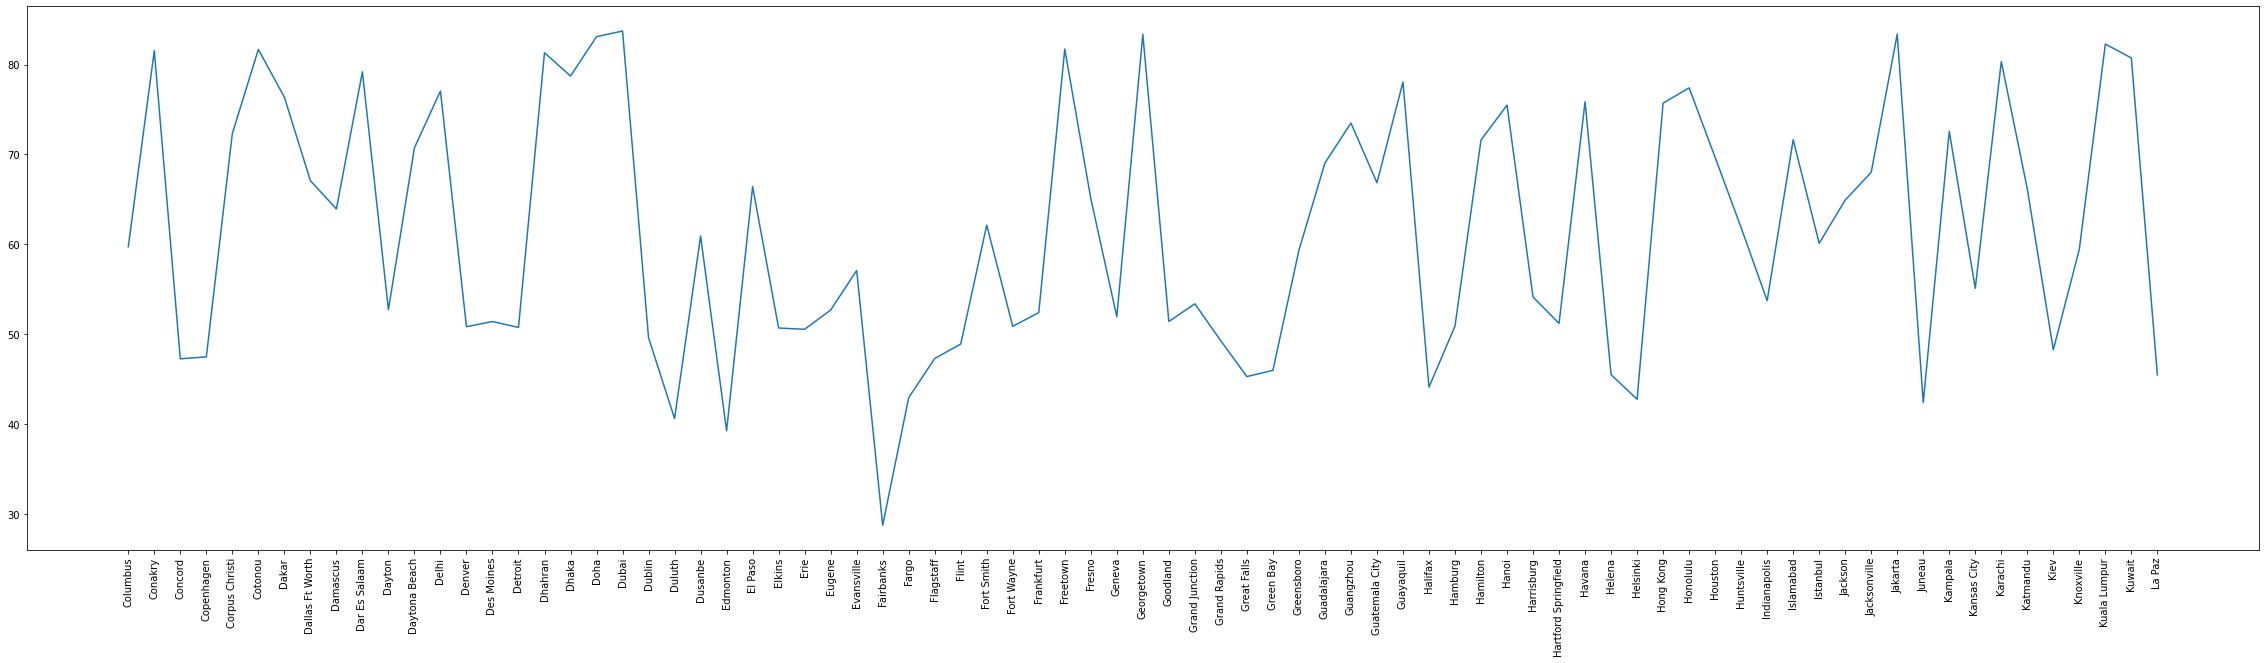

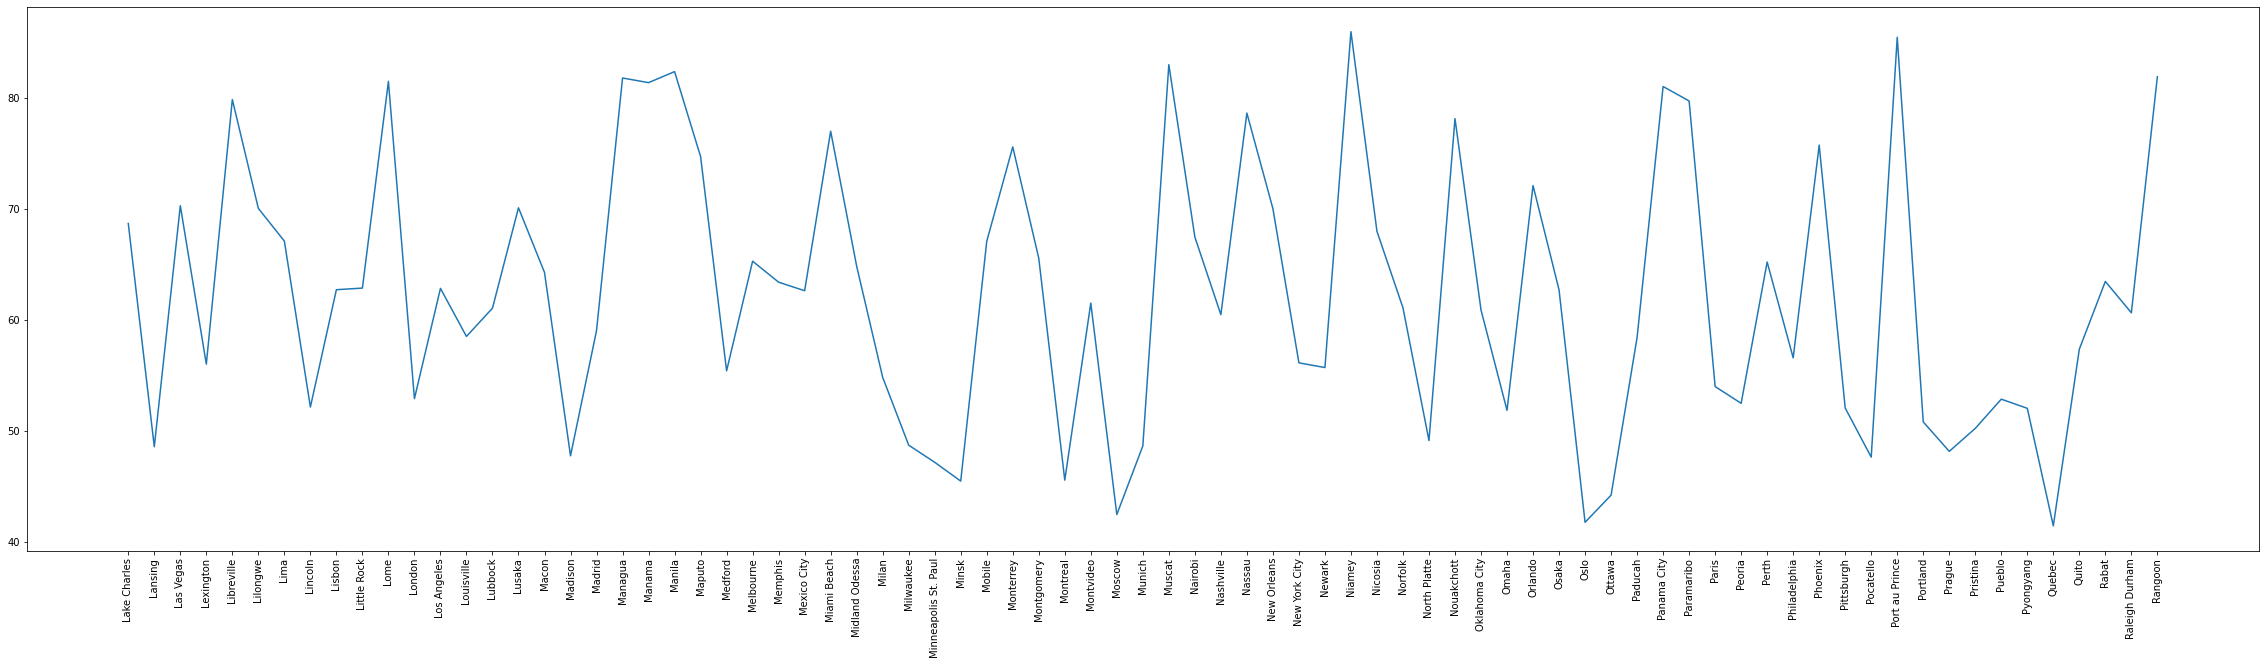

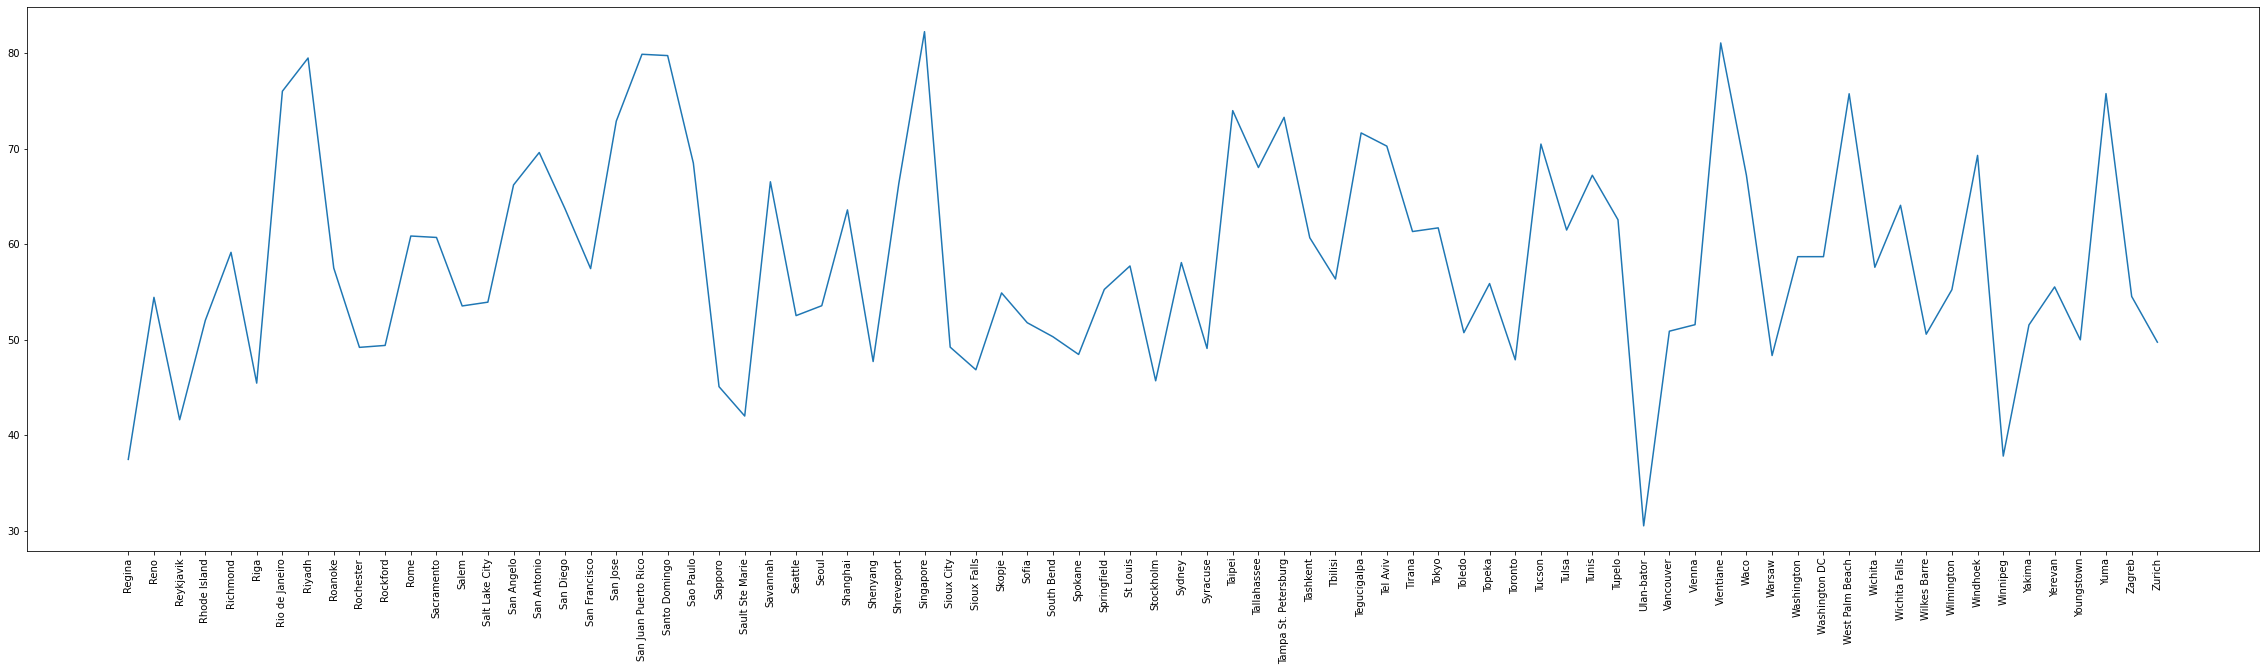

In [18]:
City = list(df.groupby('City').AvgTemperature.mean().to_dict().keys())[:80]           
AvgTemp = list(df.groupby('City').AvgTemperature.mean().to_dict().values())[:80]
plt.figure(figsize=(40,10))
plt.xticks(rotation = 90)
plt.plot(City, AvgTemp, '-')
City = list(df.groupby('City').AvgTemperature.mean().to_dict().keys())[81:160]           
AvgTemp = list(df.groupby('City').AvgTemperature.mean().to_dict().values())[81:160]
plt.figure(figsize=(40,10))
plt.xticks(rotation = 90)
plt.plot(City, AvgTemp, '-')
City = list(df.groupby('City').AvgTemperature.mean().to_dict().keys())[161:240]           
AvgTemp = list(df.groupby('City').AvgTemperature.mean().to_dict().values())[161:240]
plt.figure(figsize=(40,10))
plt.xticks(rotation = 90)
plt.plot(City, AvgTemp, '-')
City = list(df.groupby('City').AvgTemperature.mean().to_dict().keys())[241:]           
AvgTemp = list(df.groupby('City').AvgTemperature.mean().to_dict().values())[241:]
plt.figure(figsize=(40,10))
plt.xticks(rotation = 90)
plt.plot(City, AvgTemp, '-')

#### Function to find out the lattitude and longitudes of all the Cities using geocoder

In [31]:
import pandas as pd  
import numpy as np  
data = {'City':df.City.unique()}    
city_data = pd.DataFrame(data) 
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
longitude = [] 
latitude = [] 
def findGeocode(city): 
    try: 
        geolocator = Nominatim(user_agent="your_app_name") 
        return geolocator.geocode(city) 
    except GeocoderTimedOut:   
        return findGeocode(city)     
for i in (city_data["City"]): 
    if findGeocode(i) != None: 
        loc = findGeocode(i)  
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan)
city_data['Latitude'] = latitude
city_data['Longitude'] = longitude

 #### Function to find distance between two geographical coordinates

In [32]:
def distance_btw_points(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return(distance)

#### Finding distance from north and South pole
##### west is -ve, east is +ve,south is -ve north is +ve

In [33]:
dist = []
dist1 = []
for i,j in city_data.iterrows():
    d = distance_btw_points(80.65,76.28,j.Latitude,j.Longitude)
    d1 = distance_btw_points(-80.65,107.32,j.Latitude,j.Longitude)
    dist.append(d)
    dist1.append(d1)
city_data['dist_from_north'] = dist
city_data['dist_from_south'] = dist1

#### Storing it for future use because of high computation time

In [34]:
city_data.to_csv(r'C:/Users/Venom/Desktop/694560_1215964_bundle_archive/city_data.csv', index = False)

In [35]:
df = pd.merge(df,city_data,on='City')

#### one city could not be resolved

In [40]:
city_data.Latitude.isna().sum()

1

In [43]:
city_data[city_data.Latitude.isna()]

,City,Latitude,Longitude,dist_from_north,dist_from_south
165,Montvideo,NaN,NaN,NaN,NaN


##### Percentage of NULL values

In [41]:
df.isna().mean()*100

Region             0.000000
Country            0.000000
City               0.000000
Month              0.000000
Day                0.000000
Year               0.000000
AvgTemperature     0.000000
Latitude           0.328589
Longitude          0.328589
dist_from_north    0.328589
dist_from_south    0.328589
dtype: float64

#### Finding a relatio between the calculated lattitudes, longitudes, distance from the poles with average temperature

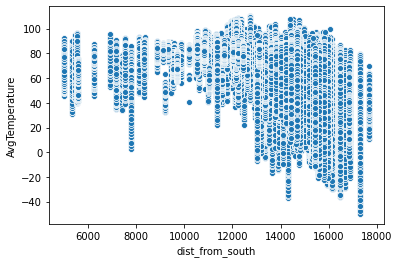

In [45]:
#very less variance of average temperature between 8000 to 12000 km 
sns.scatterplot(df.dist_from_south,df.AvgTemperature)

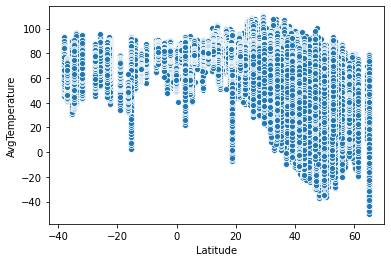

In [47]:
#very less variance of average temperature between -15 to +15
sns.scatterplot(df.Latitude,df.AvgTemperature)

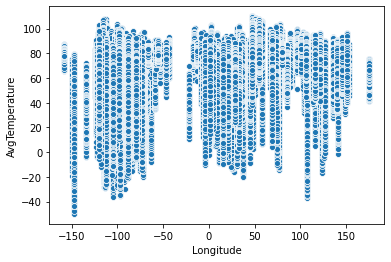

In [49]:
#good variance of average temperature
sns.scatterplot(df.Longitude,df.AvgTemperature)

In [63]:
City_count = df.groupby('City').apply(lambda x:x.shape[0]).to_dict()

#### These 4 Cities have multiple entries as there are two different cities with the same name

In [71]:
for i,j in City_count.items():
    if j>9200:
        print(i,j)

Charleston 18222
Columbus 18204
Portland 18225
Springfield 18196


In [77]:
print('Charleston : ',df[df.City=='Charleston'].State.unique())
print('Columbus :   ',df[df.City=='Columbus'].State.unique())
print('Portland :   ',df[df.City=='Portland'].State.unique())
print('Springfield: ',df[df.City=='Springfield'].State.unique())

Charleston :  ['South Carolina' 'West Virginia']
Columbus :    ['Georgia' 'Ohio']
Portland :    ['Maine' 'Oregon']
Springfield:  ['Illinois' 'Missouri']
